# AOI Course (part 1) by Hsueh-Ting Chu, Asia University, Jan., 2020
* 這個教程使用工研院AIdea人工智慧共創平台的AOI資料集做為練習的標的。
* 介紹撰寫深度學習的程式來進行自動光學檢查的瑕疵分類。
* 本notebook程式可以在雲端使用Google Colab或使用個人電腦上的Jupyter執行。

AIdea人工智慧共創平台
https://aidea-web.tw/topic/76f9ec46-cb90-4aa8-82f2-ebfed54cecfb

朱學亭老師
* EMAIL: htchu.taiwan@gmail.com
* FB: https://www.facebook.com/htchu.taiwan


#Tutorial 1: training a full CNN model for AOI 
![alt text](https://lh3.googleusercontent.com/eDcGpCgIjxaE-hcQwxbR1GuOWV6i6Yv7NYmQDc9OF46IOEVoDL68yuTtguLX2nUb8u6Qfe01l2jvFgNDHr-pfL7tFIdykYr8nmNliUfiMx_V76Y9rxAZPbZhhoPrIfmrek6cESEqKCBrZXVhjewoQ9LSJSVCeoBLlKIaY0lANzysHFOEia0_JtPD00X3Yd-1uYGgCKiVlZE8WZdZvil8jxMSE_kVM8QIQSOHYudLmZROLgdsFOoE3nWQ9zYrecuQWiq_C79d-qXi0DDM_XPMIqhKrzW-NsoPoI_Bxj4KGyzNnP2xITfnmt2Y6jqma13v8nhRPt7KI6mGiwgFEREgnjruUoDGi4G5yxMfHFOSg9aRg5TXYjxhFvWUGBW7UxxKHCcOjye61BNrQhLeKdntC6W-kT1c3cOOBlnvJRxfdcYekCkSuBg-9PpfQcvvP0LhU0vuzYgVT20VB-OWAivnlIqa59snAzSsmFoxzAxpHd-P2itJ-G4WVd0ASNfBw9FxISBioWnPkEQTU6I65cBSo1FOUiIWqlp41VJnkW2jj8zDuEAVtRmI9E1-__gz44TxBmzEa5b3EO3ujoX903yuj9YPhD8xJbtJQKKyh-08Gq2rP8bUMXN2DybXFcYE81I-oZGhqUuUuk8yO9HGfUTEW4nNXOqfvcS8qLm9Rlbv4AsL1I-xK45HvZM=w1920-h291-no)

## (A) Use TF 2.0 (Optional)
### Step 1: Choose tensorflow_version


In [51]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
tf.__path__

['C:\\Users\\nomor\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorflow\\python\\keras\\api\\_v1',
 'C:\\Users\\nomor\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorflow_estimator\\python\\estimator\\api\\_v1',
 'C:\\Users\\nomor\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorflow',
 'C:\\Users\\nomor\\anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\tensorflow\\_api\\v1']

## (B) Setup Colab and mount the AOI data folder

### Step 2: Add the data folder to your Google drive
Click https://drive.google.com/open?id=15tGIHAPAatgdB8iZh_m80jCBPa-CrI_P
![alt text](https://lh3.googleusercontent.com/r-gU6GT4MshdPDeaTjSSUIQP63ExT1ufshFMFGAjDBhu00tu9jMbMwbnjfvjSO4Q6js31X6SfOmSmQxSBS02Uj2x5HAfNvI6lyWdbgIazAlB3OQfB7d3-Cte6GrbarZzHCi_XYeufeTw-eS3GGNeOdQra9mXofIwVNBS6116XCjkVOt0zUdzJsvo_7B6HuTZLenuqJW0cTsnPdjJ_NpYcc3pqLVNlgxc7pdVeNmLhpm4AQKH5bsc6CGwpiAluRMtlPw-MmVVEtLbqCysICOHfB9xyJsc-sG6NiuLxNU4B52FFA-3xA4kVK5_xFRLYQU3ZDM9N2uSFzMszNqoSuyQaLqCcEnJHuH3IbimQEoo613MJtXuGDNMBo0nyQpWMlrRcaorrcn1eOf9IfIwAdStEMNyk-yt3PbajKS1TUnOKPXrVrS2AZZECXR3I2Mu_HQb99MapFgAG5TEJBbp0Qacer5ksM70njl3exIlWR9CosN5FXFQnlW2pEVObL-i9buIt2OtEhl5SeURzNC1vPfI-q_Knb_3VEN5OIQIO8A_chs6OJgvKxqVddw6T0vcPrGitkiyudQ1kZSel7xrSzApGuNBmUzfDYVRhMIjNF3RL6O05-daZaCTbRXtY9gulVDCaoDV7TAgRpLa3n6Kvx54QnAHtj7wuowiv9_lreRRwy9qfzTzip0MVKE=w736-h172-no)

### Step 3: Mount the AOI folder
If error, check https://myaccount.google.com/u/2/permissions 

In [2]:
#Step 3a: Mount your Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Step 3b: List the folder
!ls "/content/drive/My Drive"

### Step 4: Check the AOI data path 

In [ ]:
data_path = "  "
!ls "/content/drive/My Drive/aidea-aoi2/data/"

In [ ]:
#alternative data path for local computer
data_path = "../data/"
#!ls "../data/"
!dir/w "../data/"

## (C) Input training data

### Step 5: read lalels of the training set

In [3]:
import pandas as pd
data_path = '../data/'
df_train = pd.read_csv(data_path + 'train.csv')
print(df_train.shape)

(2528, 2)


In [4]:
df_train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


### Step 6: Build the lists of training images and labels from the dataframe

In [5]:
#limit the amount of training images for the class process
#train_num = df_train.shape[0]
train_num = 480
if train_num >= df_train.shape[0]:
    train_num = df_train.shape[0]
train_files = df_train.iloc[:train_num,0].values
train_labels = df_train.iloc[:train_num,1].values

print(train_labels[:20])

[0 1 1 5 5 5 3 0 3 5 3 5 3 3 1 1 1 1 5 1]


### Step 7: read images of the training set

In [6]:
train_path = data_path+ "train_images/"
train_images = []
from tensorflow.keras.preprocessing import image
for file in train_files:
    img = image.load_img(train_path+file, color_mode="grayscale")
    train_images.append(img)
    if len(train_images)%100 == 0:
        print('.', end='')
print(len(train_images))

....480


### Step 8: show AOI images of the classes: 
0 (normal), 1 (void), 2 (horizontal  defect) 3 (vertical defect), 4 (edge defect), 5 (particle)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

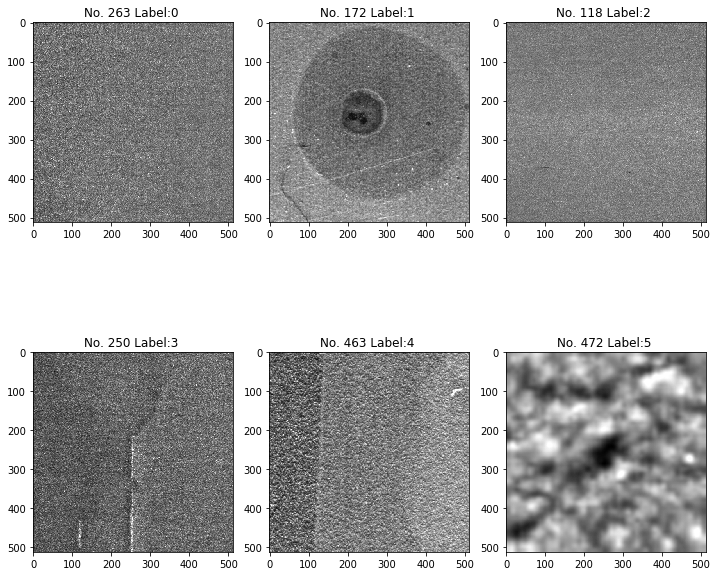

In [8]:
import random
curclass = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0, train_num )
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        curclass += 1
        curclass %= 6
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

### Step 9: Show statistics of training images in the 6 classes

In [9]:
import numpy as np
labels, counts = np.unique(train_labels, return_counts=True)
print(labels, counts)

[0 1 2 3 4 5] [119 108  16  77  49 111]


### Step 10: Plot the counts 

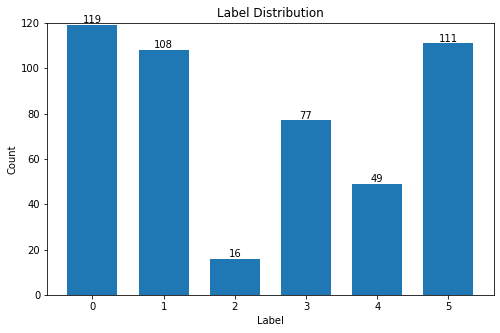

In [10]:
fig = plt.figure(figsize=(8, 5))
plt.bar(labels, counts, width=0.7, align='center')
plt.title("Label Distribution")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.ylim(0, 120)

for a, b in zip(labels, counts):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=10)
plt.show()

### Step 11: Check the shape of single image 

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array
# convert to numpy array
img_array0 = img_to_array(train_images[0])
print(img_array0.shape)
del img_array0

(512, 512, 1)


### Step 12: Convert each training image into a numpy array and collect

In [12]:
arr = []
from tensorflow.keras.preprocessing.image import img_to_array
for img in train_images:
    img_array = img_to_array(img)/255
    arr.append(img_array)

    
X_train = np.array(arr)
print(X_train.shape)

(480, 512, 512, 1)


In [13]:
# The pixel value in [0,1)
print(X_train[0, 0 , 0 , 0])

0.67058825


### Step 13:One-hot encoding for labels

In [14]:
from tensorflow.keras.utils import to_categorical
# one-hot encoding
num_classes = 6
y_train = to_categorical(train_labels, num_classes)
print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


## (D) Model training and inference, including: 
定義（define）, 編譯（compile）, 訓練（fit）, 評估（evaluate）, 預測（prediction） 

### Step 14: define the CNN model

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [16]:
#create model
model = Sequential()
#add model layers

model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (512,512,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(6, activation = "softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 508, 508, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 96)      55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 96)        8

### Step 15: compile the model

In [18]:
#compile model using accuracy to measure model performance
model.compile( optimizer='adam',loss='categorical_crossentropy' , metrics=['accuracy'])

### Step 16: fit the model

In [19]:
#train the model
hist = model.fit( X_train, y_train , batch_size=20, epochs=20)

Epoch 1/20
480/480 [==============================] - 10s 20ms/sample - loss: 1.8138 - acc: 0.2104
Epoch 2/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.7138 - acc: 0.2292
Epoch 3/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.7052 - acc: 0.2146
Epoch 4/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.6770 - acc: 0.2313
Epoch 5/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.6280 - acc: 0.2583
Epoch 6/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.6117 - acc: 0.2937
Epoch 7/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.5410 - acc: 0.3521
Epoch 8/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.3811 - acc: 0.4146
Epoch 9/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.4639 - acc: 0.3938
Epoch 10/20
480/480 [==============================] - 6s 12ms/sample - loss: 1.4049 - acc: 0.3917
Epoch 11/20
480/48

### Step 17: evaluate the model

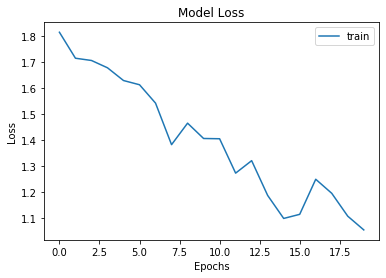

In [20]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

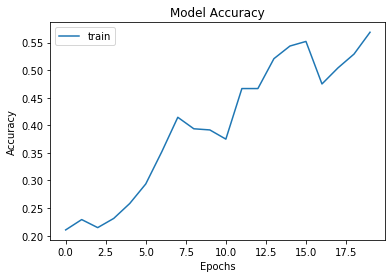

In [25]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

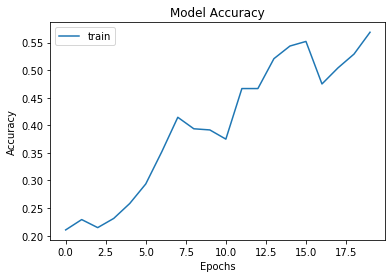

In [23]:
#if tf.__version__ < "2.x":
plt.plot(hist.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

### Step 18: predict with the model for the training set

In [26]:
y_prediction = model.predict( X_train , batch_size=20)
print(y_prediction[:2])

[[4.06352878e-01 5.53594753e-02 8.76871794e-02 3.49626482e-01
  1.00973576e-01 4.49397078e-07]
 [3.28288853e-01 2.76961714e-01 6.52602986e-02 1.20850176e-01
  2.08525077e-01 1.13898866e-04]]


In [27]:
predict = np.argmax(y_prediction,axis=1)
print(predict[0:10])

[0 0 5 5 5 5 0 1 3 5]


In [28]:
print(train_labels[:10])

[0 1 1 5 5 5 3 0 3 5]


### Step 19: Compute confusion matrix (混淆矩陣)

In [29]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix( train_labels, predict  )
print(confusion)

[[ 73  43   0   2   0   1]
 [ 17  66   0   0   0  25]
 [ 10   4   0   2   0   0]
 [ 48   7   0  22   0   0]
 [  8  38   0   3   0   0]
 [  0   0   0   0   0 111]]


### Step 20: Plot the confusion matrix

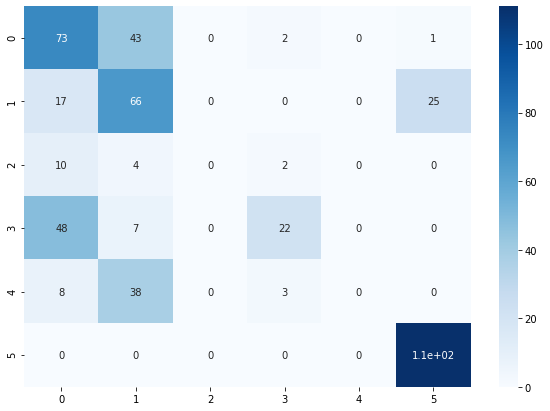

In [30]:
import seaborn as sn
df_cm = pd.DataFrame(confusion)
plt.figure(figsize = (10,7))
sn.heatmap(  df_cm  , annot=True, cmap="Blues")

### Step 21: List overkills and underkills

In [32]:
overkill= []
underkill = []
for i in range(train_num):
  if train_labels[i] == 0 and predict[i] !=0 :
    overkill.append(i)
  if train_labels[i] != 0 and predict[i] ==0:
    underkill.append(i)
print('# of overkill= {}; # of underkill= {} '.format(len(overkill), len(underkill)))

# of overkill= 46; # of underkill= 83 


### Step 22: Check overkills

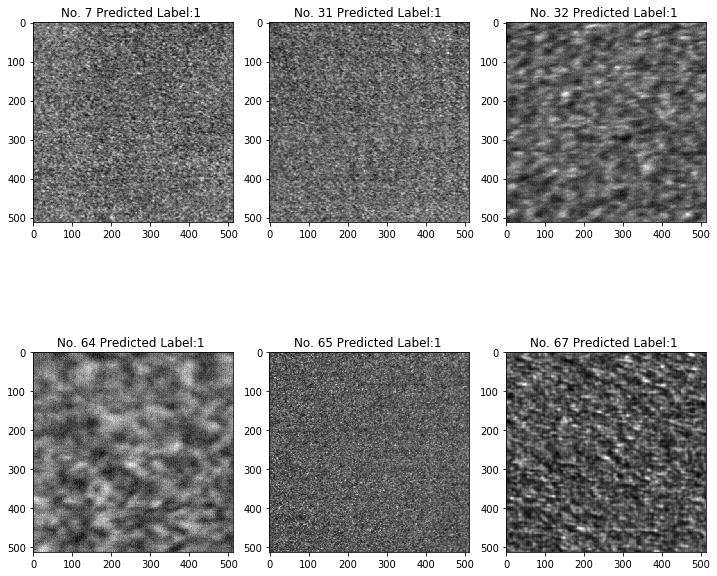

In [33]:
#overkill
overkill_num = len(overkill)
no = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        if no>=overkill_num:
          break 
        sel = overkill[no]
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Predicted Label:{} '.format(sel, predict[sel])) 
        no += 1
plt.tight_layout()

### Step 23: Check underkills

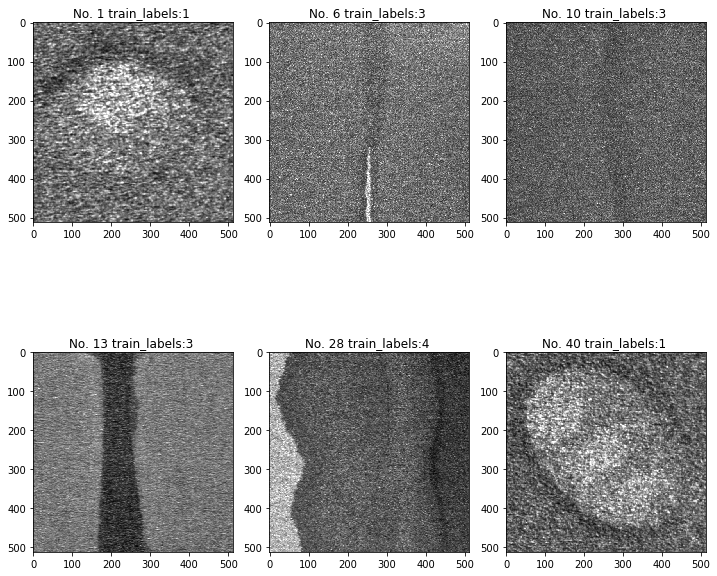

In [34]:
#underkill
underkill_num = len(underkill)
no = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        if no>=underkill_num:
          break 
        sel = underkill[no]
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} train_labels:{} '.format(sel, train_labels[sel])) 
        no += 1
plt.tight_layout()

### Step 24: Save the model

In [35]:
model.save("AOICNN_10epochs-2020.h5")

In [36]:
model = tf.keras.models.load_model('AOICNN_10epochs-2020.h5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 508, 508, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 96)      55392     
__________________

### Step 25: Delete training data in memory

In [37]:
del train_images
del X_train
#Do GC
import gc
gc.collect()

29570

# (E) Output test result
* 讀入測試資料

### Step 26: read lalels of the test set

In [39]:
df_test = pd.read_csv(data_path+ "test.csv")
#df_train = pd.read_csv(data_path + 'train.csv')
print(df_test.shape)

(10142, 2)


In [40]:
df_test.head()

,ID,Label
0,test_00000.png,NaN
1,test_00001.png,NaN
2,test_00002.png,NaN
3,test_00003.png,NaN
4,test_00004.png,NaN


### Step 27: Build the lists of test images and labels from the dataframe

In [41]:
test_num =  480 #limit the amount of training images for the class process
#test_num = df_test.shape[0]
if test_num >= df_test.shape[0]:
  test_num = df_test.shape[0]
test_files  = df_test.iloc[:test_num,0].values
test_labels = df_test.iloc[:test_num,1].values
print(test_labels[:10])

[nan nan nan nan nan nan nan nan nan nan]


### Step 28: read images of the test set

In [42]:
!ls '/content/drive/My Drive/aidea-aoi2/data/test_images/'

'ls' 不是內部或外部命令、可執行的程式或批次檔。


In [44]:
test_path = data_path+ "test_images/"
test_images = []
from tensorflow.keras.preprocessing import image
for file in test_files:
    img = image.load_img(test_path+file, color_mode="grayscale")
    test_images.append(img)
    if len(test_images)%100 == 0:
      print('.', end='')
print(len(test_images))

....480


### Step 29: show AOI test images: 

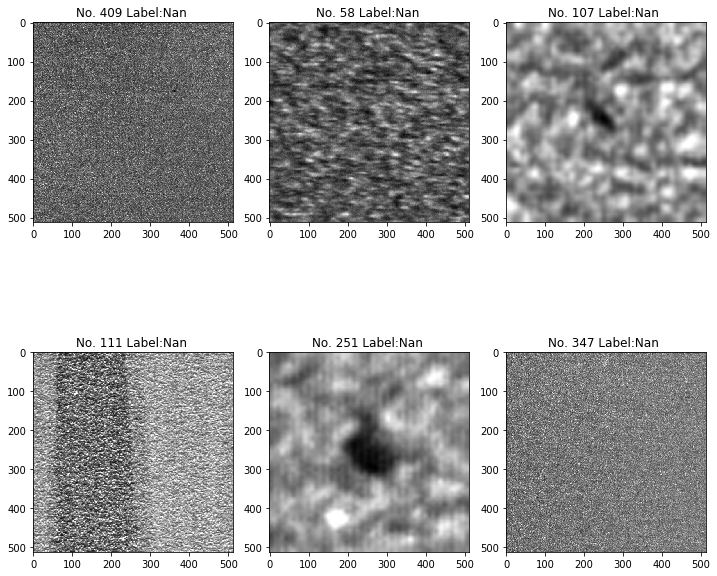

In [45]:
import random
fig,ax=plt.subplots(2,3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,test_num)
        ax[i,j].imshow(test_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:Nan '.format(sel))       
plt.tight_layout()

### Step 30: Convert each test image into a numpy array and collect

In [46]:
arr = []
from tensorflow.keras.preprocessing import image
for img in test_images:
    img_array = img_to_array(img)/127.5 -1
    arr.append(img_array)

    
X_test = np.array(arr)
print(X_test.shape)

(480, 512, 512, 1)


In [47]:
print(X_test[0, 0 , 0 , 0])

0.45098042


### Step 31: predict with the model for the test set

In [48]:
y_prediction = model.predict(X_test, batch_size=20)
predict = np.argmax(y_prediction,axis=1)
print(predict[:20])

[3 3 5 0 3 5 1 1 1 3 3 3 3 0 3 3 3 5 0 3]


### Step 32: show predictions 

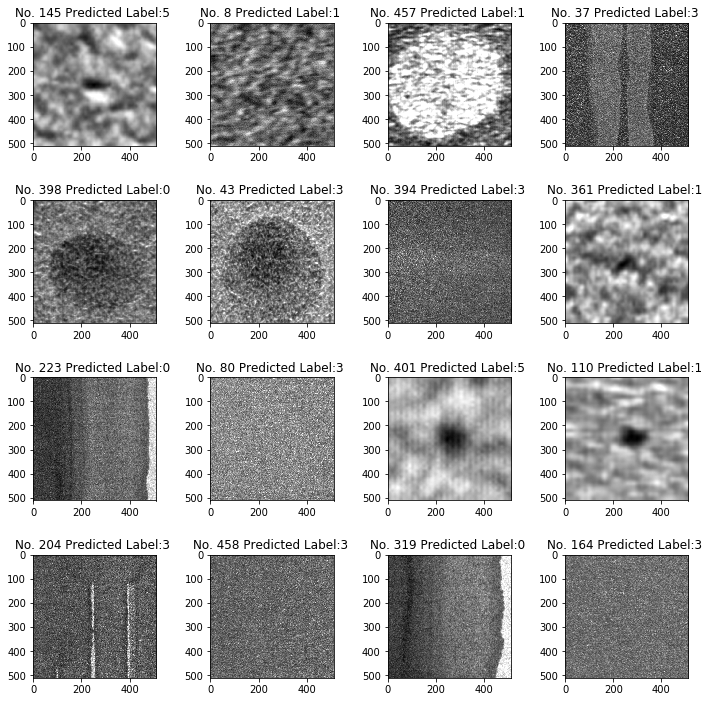

In [49]:
import random
fig,ax=plt.subplots(4,4)
fig.set_size_inches(10,10)
for i in range(4):
    for j in range (4):
        sel=random.randint(0,len(test_images))
        ax[i,j].imshow(test_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Predicted Label:{} '.format(sel, predict[sel]))       
plt.tight_layout()

### Step 33: output predictions

In [50]:
df_out = pd.DataFrame(df_test.iloc[:test_num])
df_out['Label'] = predict
df_out.to_csv("submission-20200114A.csv", index=False)